# **Indonesia Credit Customer Segmentation**

Dalam project ini dilakukan customer segmentation dengan teknik clustering algoritma K-Means. Sebelum modelling, data melewati beberapa tahapan preprocessing seperti: handling outliers dan missing values, feature scaling, dan dimensional reduction. Evaluasi dari algoritma ini dapat dilihat dari visualisasi clusteringnya. Pada visualisasi clustering, tampak pemisah yang jelas antar clusternya, sehingga dapat disimpulkan hasil dari clustering cukup bagus.

Terdapat 3 cluster yang terbentuk, yaitu cluster 0, cluster 1, dan cluster 2.

# **1 - Introduction**

- Nama: Afifah Rahma Tifani
- Dataset: Indonesia Credit Data Sinarmas
- Objective: Credit Customer Segmentation

# **2 - External Link**

-

# **3 - Working Area**

## **Import Libraries**


In [2]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Define Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter


import warnings
warnings.filterwarnings('ignore')

# Model Algorithm
from sklearn.cluster import KMeans
import prince

# Standarize the Datasets
from sklearn.preprocessing import MinMaxScaler

# Evaluate Models
from sklearn import metrics
from sklearn.metrics import silhouette_score,silhouette_samples

# Save Model
from tables import file
import joblib
import json
from matplotlib.font_manager import json_load

## **Data Loading**

In [4]:
# Load Dataset

rawdf = pd.read_excel('/content/IndonesiaCreditData.xlsx', sheet_name='Dataset')

rawdf

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV


In [5]:
# Duplicate Dataset

df_copy = rawdf.copy()
df_copy

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV


In [6]:
# Check dataset - 1

rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


- Dapat diketahui bahwa kita memiliki 10 kolom dan 1000 entries. 4 kolom numerikal dan sisanya bertipe object.
- Terdapat missing values pada kolom `Saving accounts` dan `Checking account`

In [7]:
# Check dataset - 2

rawdf.describe()

,No,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,499.500000,35.546000,1.904000,4.056033e+07,20.903000
std,288.819436,11.375469,0.653614,3.499911e+07,12.058814
min,0.000000,19.000000,0.000000,3.099750e+06,4.000000
25%,249.750000,27.000000,2.000000,1.693083e+07,12.000000
50%,499.500000,33.000000,2.000000,2.875948e+07,18.000000
75%,749.250000,42.000000,2.000000,4.925193e+07,24.000000
max,999.000000,75.000000,3.000000,2.284392e+08,72.000000


- Usia termuda yaitu pada usia 19 tahun dan usia tertua yaitu usia 75 tahun.
- Jumlah credit amount berkisar antara 3 juta rupiah hingga 220 juta rupiah.
- Rata- rata durasi peminjaman yaitu 21 bulan.

Sebelum dilakukan EDA, dilakukan drop untuk beberapa kolom berdasarkan personal judgement:

- `No` = unique untuk setiap baris, tidak membantu dalam modelling clustering.

In [8]:
# Remove columns based on personal judgement

df = rawdf.drop(['No'],axis=1)

## **Exploratory Data Analysis**

In [9]:
# see column n-unique

df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

In [10]:
df_num = df[['Age','Credit amount', 'Duration']]

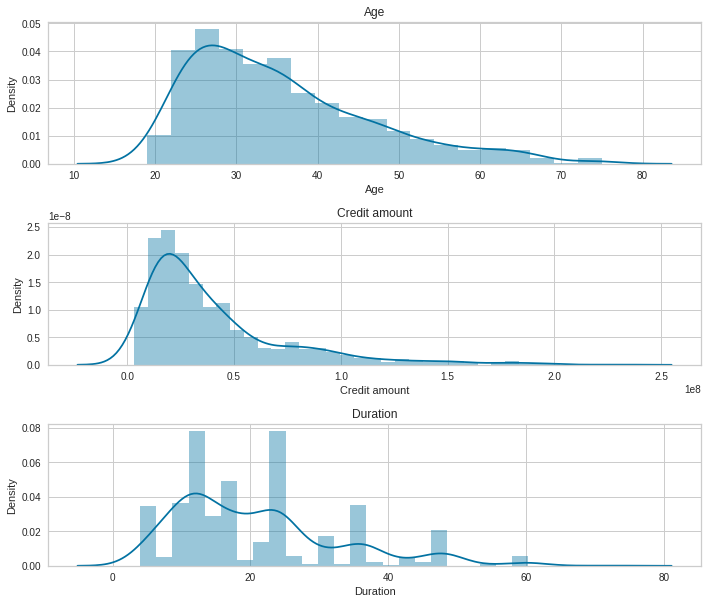

In [11]:
# histplot of columns 

plt.figure(figsize=(10,50))
for i in range(len(df_num.columns)):
  plt.subplot(18, 1, i + 1)
  sns.distplot(df_num[df_num.columns[i]], kde = True)
  plt.title(df_num.columns[i])
plt.tight_layout();

- Hampir semua kolom terdistribusi secara skewed.
- Mayoritas customer berusia produktif yaitu 25 tahun - 35 tahun.
- Mayoritas credit amount yang dimiliki customer yaitu pada rentang 10 juta rupiah hingga 40 juta rupiah.

Text(0.5, 1.0, 'Type of Checking Account')

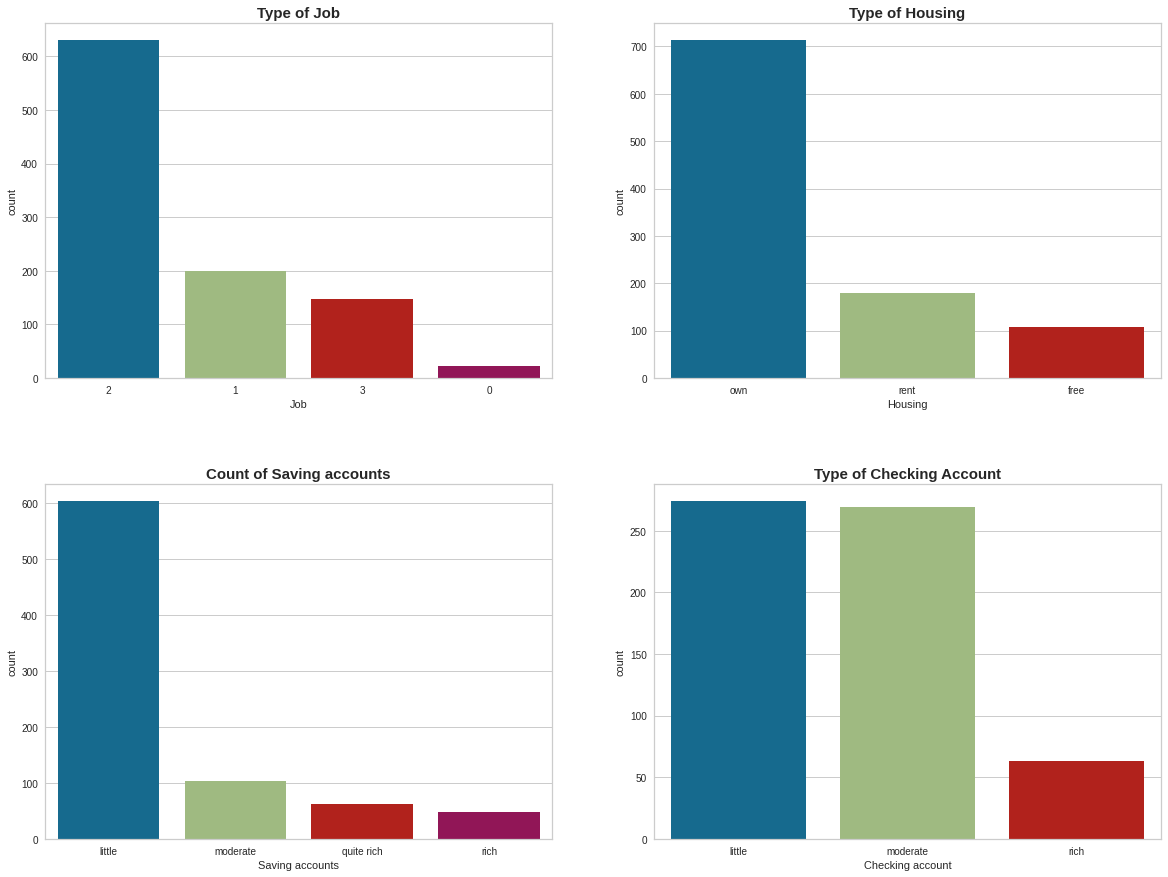

In [12]:
# Show barplot of unique values of Job, Housing, Saving accounts, and Checking account

fig,axs = plt.subplots(2,2, figsize = (20,15))
plt.subplot(2, 2, 1)
plt.subplots_adjust(hspace = 0.3)
sns.countplot(x = 'Job',
              data = df,
              order = df['Job'].value_counts().index)
plt.title('Type of Job', weight='bold', fontsize=15)

plt.subplot(2, 2, 2)
sns.countplot(x = 'Housing',
              data = df,
              order = df['Housing'].value_counts().index)
plt.title('Type of Housing', weight='bold', fontsize=15)


plt.subplot(2, 2, 3)
sns.countplot(x = 'Saving accounts',
              data = df,
              order = df['Saving accounts'].value_counts().index)
plt.title('Count of Saving accounts', weight='bold', fontsize=15)

plt.subplot(2, 2, 4)
sns.countplot(x = 'Checking account',
              data = df,
              order = df['Checking account'].value_counts().index)
plt.title('Type of Checking Account', weight='bold', fontsize=15)


- Mayortitas customer memiliki job pada category skilled.
- Mayoritas customer memiliki tempat tinggal milik  pribadi.
- Mayoritas customer memiliki rekening tabungan dengan kategori little.
- Mayoritas customer memiliki checking account dengan kategori little dan moderate.

Text(0.5, 1.0, 'Percentage of Sex')

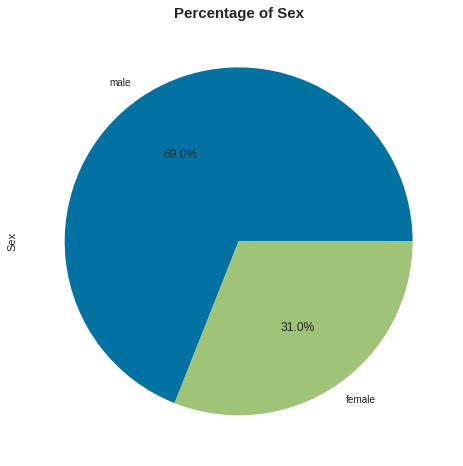

In [13]:
# Show pie-chart of sex

df['Sex'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')

plt.title('Percentage of Sex', weight='bold', fontsize=15)

- 69% customer berjenis kelamin laki-laki dan 31% sisanya berjenis kelamin perempuan.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

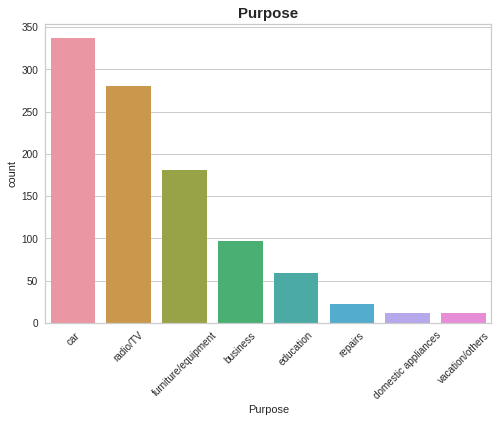

In [14]:
# Show barplot of Purpose

sns.countplot(x = 'Purpose',
              data = df,
              order = df['Purpose'].value_counts().index)
plt.title('Purpose', weight='bold', fontsize=15)
plt.xticks(rotation=45)


- Tujuan peminjaman paling banyak adalah untuk tujuan kredit mobil, pembelian radio/TV, dan pembelin furniture/equipment.


## **Data Preprocessing**

In [15]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state=10)

df_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
841,28,male,1,own,little,NaN,37110207,21,car
956,49,male,1,own,NaN,rich,45330744,30,radio/TV
544,61,male,1,own,little,NaN,15560745,12,car
173,33,male,2,own,little,moderate,17532186,8,radio/TV
759,35,male,2,own,little,little,8567709,12,car
955,57,female,3,rent,rich,little,15263169,24,radio/TV
121,41,female,3,rent,little,NaN,47959332,24,car
230,26,male,2,own,little,rich,52199790,36,radio/TV
11,24,female,2,rent,little,little,53414892,48,business
120,25,female,2,own,little,little,22752165,21,radio/TV


In [16]:
# Remove inference Set from dataset

df_1 = df.drop(df_inf.index)

df_1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,49,male,1,own,little,NaN,25988304,12,education
3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,40,male,3,own,little,little,47822943,30,car
997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,23,male,2,free,little,little,22876155,45,radio/TV


In [17]:
# Reset Index

df_1.reset_index(drop=True, inplace=True)

df_1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,49,male,1,own,little,NaN,25988304,12,education
3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...
985,31,female,1,own,little,NaN,21524664,12,furniture/equipment
986,40,male,3,own,little,little,47822943,30,car
987,38,male,2,own,little,NaN,9968796,12,radio/TV
988,23,male,2,free,little,little,22876155,45,radio/TV


In [18]:
# Reset Index of df_inf

df_inf.reset_index(drop=True, inplace=True)

df_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,28,male,1,own,little,NaN,37110207,21,car
1,49,male,1,own,NaN,rich,45330744,30,radio/TV
2,61,male,1,own,little,NaN,15560745,12,car
3,33,male,2,own,little,moderate,17532186,8,radio/TV
4,35,male,2,own,little,little,8567709,12,car
5,57,female,3,rent,rich,little,15263169,24,radio/TV
6,41,female,3,rent,little,NaN,47959332,24,car
7,26,male,2,own,little,rich,52199790,36,radio/TV
8,24,female,2,rent,little,little,53414892,48,business
9,25,female,2,own,little,little,22752165,21,radio/TV


### Handling Outliers

Identify Variable Distribution

In [19]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

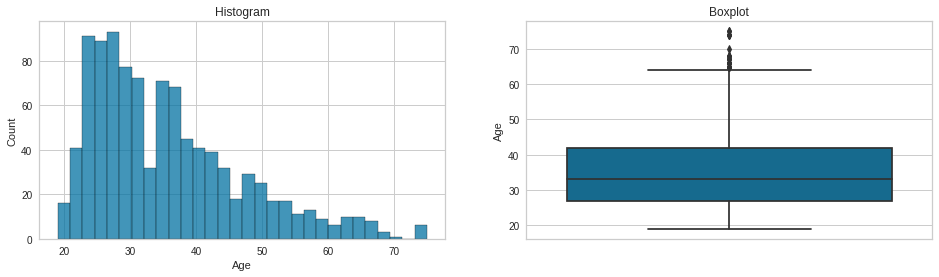


Skewness Value Age:  1.0252819446333032


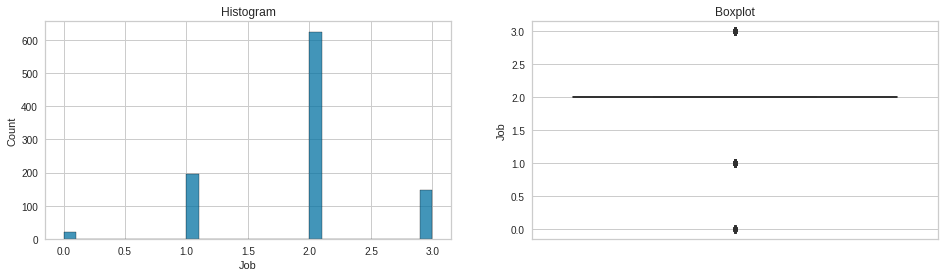


Skewness Value Job:  -0.380649347853273


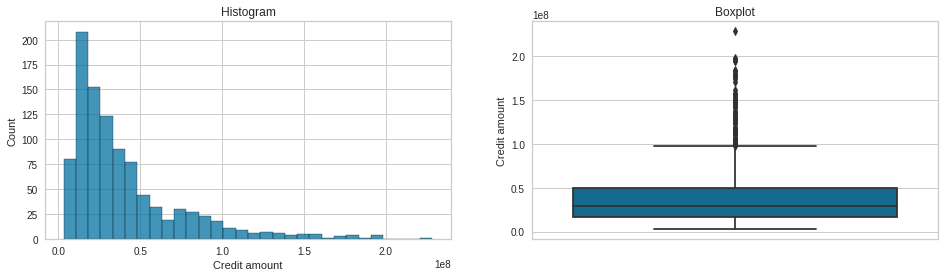


Skewness Value Credit amount:  1.942375378849016


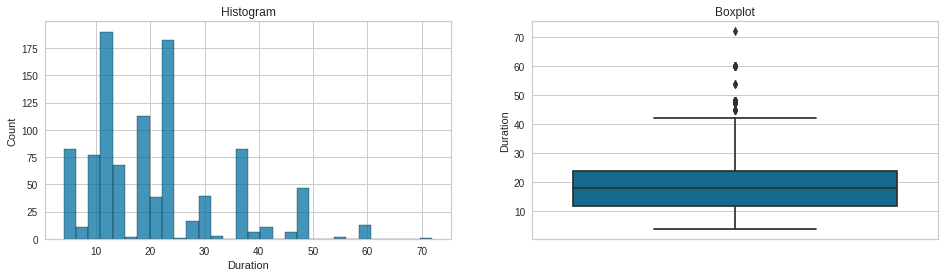


Skewness Value Duration:  1.099430736981732


In [20]:
# Plot distribution of columns

diagnostic_plots(df_1, 'Age')
print('\nSkewness Value Age: ', df_1['Age'].skew())

diagnostic_plots(df_1, 'Job')
print('\nSkewness Value Job: ', df_1['Job'].skew())

diagnostic_plots(df_1, 'Credit amount')
print('\nSkewness Value Credit amount: ', df_1['Credit amount'].skew())

diagnostic_plots(df_1, 'Duration')
print('\nSkewness Value Duration: ', df_1['Duration'].skew())

- semua kolom numerikal terdistribusi skew, kecuali kolom Job.
- Dari boxplot, kita dapat menyimpulkan banyak outliers pada tiap kolomnya. 


Detect Outliers 

- Berdasarkan personal judgement, hanya akan dihandle outliers pada beberapa kolom. Dikarenakan nilai-nilai outliers pada kolom `Job` diasumsikan sebagai variasi data dan bukan karena error saat proses collecting data.
- Kolom-kolom ini berdistribusi skew, sehingga deteksinya digunakan teknik Tukey's Rule.

In [21]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

Limits for Outliers

In [22]:
# Limits for columns

upper_limit1, lower_limit1 = find_skewed_boundaries(df_1, 'Age', 1.5)
upper_limit1, lower_limit1

upper_limit3, lower_limit3 = find_skewed_boundaries(df_1, 'Credit amount', 1.5)
upper_limit3, lower_limit3

upper_limit4, lower_limit4 = find_skewed_boundaries(df_1, 'Duration', 1.5)
upper_limit4, lower_limit4

(42.0, -6.0)

In [23]:
# Flag the outliers in category `age`

outliers_1 = np.where(df_1['Age'] > upper_limit1, True,
                       np.where(df_1['Age'] < lower_limit1, True, False))

outliers_3 = np.where(df_1['Credit amount'] > upper_limit3, True,
                       np.where(df_1['Credit amount'] < lower_limit3, True, False))

outliers_4 = np.where(df_1['Duration'] > upper_limit4, True,
                       np.where(df_1['Duration'] < lower_limit4, True, False))

print(outliers_1[:10])

[ True False False False False False False False False False]


In [24]:
# Let's trim the dataset

df_trimmed = df_1.loc[~(outliers_1  + outliers_3 + outliers_4)]
print('Size dataset - Before trimming : ', df_1.shape)
print('Size dataset - After trimming  : ', df_trimmed.shape)

Size dataset - Before trimming :  (990, 9)
Size dataset - After trimming  :  (852, 9)


### Handling Missing Values

In [25]:
# Check Missing Values 

df_trimmed.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     147
Checking account    352
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [26]:
# Calculate the percentage of missing values

percent_missing_sa = df_trimmed['Saving accounts'].isnull().sum() * 100 / len(df_1)
percent_missing_ca = df_trimmed['Checking account'].isnull().sum() * 100 / len(df_1)

print(percent_missing_sa)
print(percent_missing_ca)

14.848484848484848
35.55555555555556


In [27]:
# fill NaN with modes

df_trimmed["Saving accounts"].fillna( df_trimmed["Saving accounts"].mode()[0], inplace=True)
df_trimmed["Checking account"].fillna( df_trimmed["Checking account"].mode()[0], inplace=True)

In [28]:
# Check Missing Values

df_trimmed.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [29]:
df_trimmed.reset_index(drop=True, inplace=True)

### Feature Scaling

In [30]:
# Get Numerical Columns and Categorical Columns

num_columns = df_trimmed.select_dtypes(include=np.number).columns.tolist()
cat_columns = df_trimmed.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['Age', 'Job', 'Credit amount', 'Duration']
Categorical Columns :  ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


In [31]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_trimmed[num_columns])

df_scaled

array([[0.66666667, 0.33333333, 0.24241628, 0.21052632],
       [0.75555556, 0.66666667, 0.60669731, 0.52631579],
       [0.75555556, 0.66666667, 0.33946159, 0.52631579],
       ...,
       [0.26666667, 0.33333333, 0.19514117, 0.21052632],
       [0.46666667, 1.        , 0.47367039, 0.68421053],
       [0.42222222, 0.66666667, 0.07275115, 0.21052632]])

In [32]:
# Change df_scaled to DataFrame

df_scaled1= pd.DataFrame(df_scaled, columns = num_columns)
df_scaled1

,Age,Job,Credit amount,Duration
0,0.666667,0.333333,0.242416,0.210526
1,0.755556,0.666667,0.606697,0.526316
2,0.755556,0.666667,0.339462,0.526316
3,0.355556,1.000000,0.879580,0.842105
4,0.933333,0.333333,0.368877,0.210526
...,...,...,...,...
847,0.244444,1.000000,0.487065,0.842105
848,0.688889,0.666667,0.281024,0.210526
849,0.266667,0.333333,0.195141,0.210526
850,0.466667,1.000000,0.473670,0.684211


In [33]:
df_cat = df_trimmed[cat_columns]
df_cat

,Sex,Housing,Saving accounts,Checking account,Purpose
0,male,own,little,little,education
1,male,free,little,little,car
2,male,own,quite rich,little,furniture/equipment
3,male,rent,little,moderate,car
4,male,own,rich,little,radio/TV
...,...,...,...,...,...
847,male,own,little,little,furniture/equipment
848,male,own,little,little,car
849,female,own,little,little,furniture/equipment
850,male,own,little,little,car


In [34]:
df_final = pd.concat([df_scaled1, df_cat], axis = 1)
df_final

,Age,Job,Credit amount,Duration,Sex,Housing,Saving accounts,Checking account,Purpose
0,0.666667,0.333333,0.242416,0.210526,male,own,little,little,education
1,0.755556,0.666667,0.606697,0.526316,male,free,little,little,car
2,0.755556,0.666667,0.339462,0.526316,male,own,quite rich,little,furniture/equipment
3,0.355556,1.000000,0.879580,0.842105,male,rent,little,moderate,car
4,0.933333,0.333333,0.368877,0.210526,male,own,rich,little,radio/TV
...,...,...,...,...,...,...,...,...,...
847,0.244444,1.000000,0.487065,0.842105,male,own,little,little,furniture/equipment
848,0.688889,0.666667,0.281024,0.210526,male,own,little,little,car
849,0.266667,0.333333,0.195141,0.210526,female,own,little,little,furniture/equipment
850,0.466667,1.000000,0.473670,0.684211,male,own,little,little,car


### Check Multicollinearity

In [35]:
#Cek Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_scaled1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_scaled1.values, i) for i in range(len(df_scaled1.columns))]

vif_data

,feature,VIF
0,Age,2.754076
1,Job,5.115486
2,Credit amount,4.004844
3,Duration,4.629602


## **FAMD**

Factorial Analysis of Mixed Data (FAMD) digunakan sebagai dimensional reduction pada kumpulan data yang berisi variabel numerik dan kategorikal

In [36]:
import prince

famd = prince.FAMD(n_components=2, n_iter=3,
                   copy=True, check_input=True,
                   engine='auto',random_state=42)

famd = famd.fit(df_final)
coords = famd.row_coordinates(df_final)

In [37]:
coords

,0,1
0,-0.880671,1.442823
1,1.613467,1.496535
2,0.639756,1.118003
3,2.893867,-0.944989
4,-0.550360,1.943477
...,...,...
847,2.107823,-0.453948
848,0.005425,1.381432
849,-1.141218,-0.677768
850,1.854795,0.532276


## **Clustering using KMeans**

### Elbow Method

In [38]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=26).fit(coords)
                for k in range(1, 9)]

Elbow Method


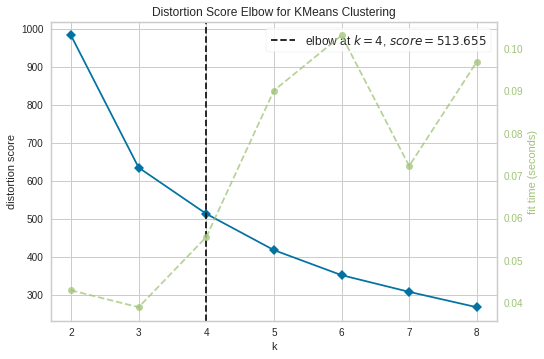

In [39]:
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=8)
Elbow_M.fit(coords)
Elbow_M.show()

- Dari hasil elbow method, garis elbow terdapat pada K= 4
- Kita akan melakukan teknik lain yaitu sillouete method.

### Silhouette Method

In [40]:
k=[2,3,4,5,6,7,8,9]
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(coords)
                for k in range(1, 9)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [41]:
silhouette_scores = [silhouette_score(coords, model.labels_)
                     for model in kmeans_per_k[1:]]

In [42]:
silhouette_scores

[0.35389461399277483,
 0.3658300085405587,
 0.33707750892355215,
 0.331943423277859,
 0.33797348799130683,
 0.3311337770536266,
 0.33894545418116984]

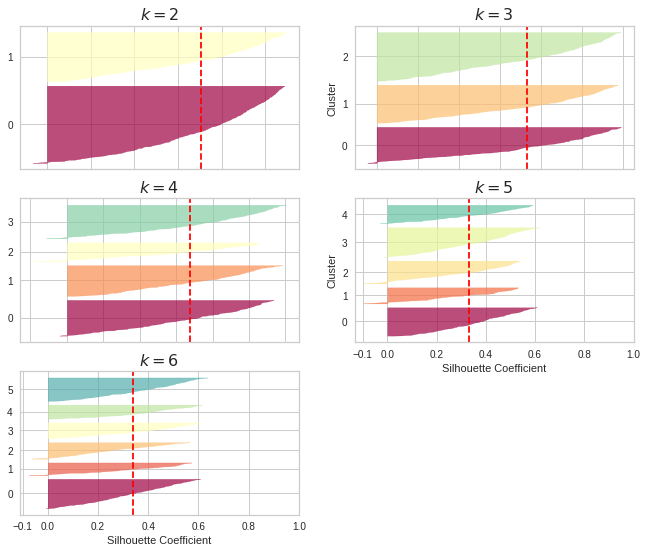

In [43]:
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(coords, y_pred)

    padding = len(coords) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Text(0, 0.5, 'Silhouette Score')

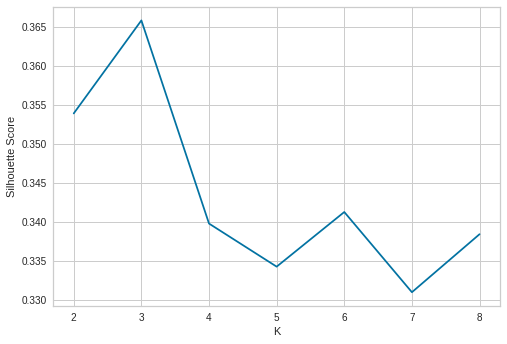

In [44]:
# Finding number of K using Sillhouete plot

K1=[2,3,4,5,6,7,8]
#inertia=[KMeans(n_clusters=i).fit(X2D).inertia_ for i in K]
s_score=[silhouette_score(coords, KMeans(n_clusters=i).fit(coords).labels_) for i in K1]
plt.plot(K1,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

- Dari hasil sillouete score untuk masing-masing K, diketahui bahwa K=3 memiliki silloute score paling tinggi yaitu 0.36.
- Maka kita akan menggunakan nilai K=3 untuk clustering.

### Model Definition

In [45]:
# Define Model

kmean= KMeans(3)
kmean.fit(coords)
labels=kmean.labels_

In [46]:
# See labels

labels

array([2, 0, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0,
       2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1,
       2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2,
       2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2,
       2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0,

### Model Evaluation

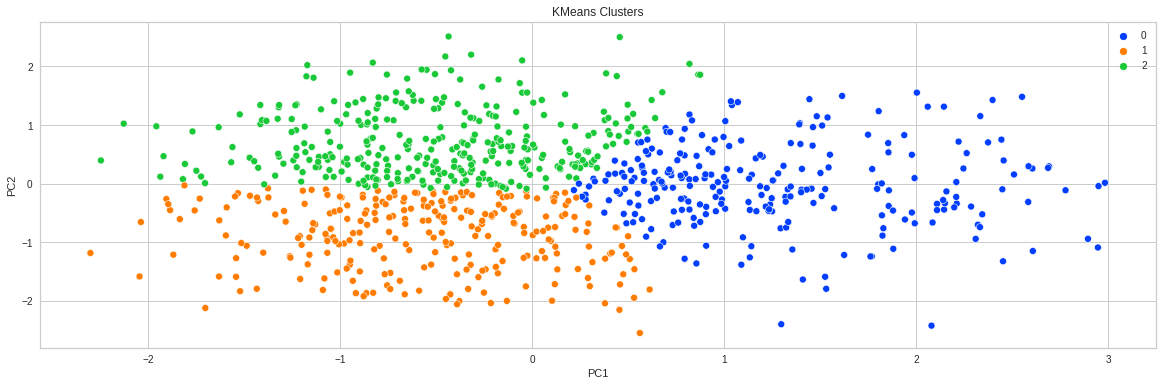

In [47]:
# plotting kmeans clusters using PCA
plt.figure(figsize=(20, 6))
sns.scatterplot(x=coords.iloc[:, 0], y=coords.iloc[:, 1], hue=kmean.labels_, palette='bright')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

Hasil visualisasi menunjukkan bahwa garis pemisah antar clusternya jelas, sehingga dapat dikatakan hasil clusternya bagus.




## **Cluster Analysis**

Selanjutnya, dilakukan assign masing-masing label untuk masing-masing data.

In [48]:
# Make dataframe with data and cluster label

df_2 = df_trimmed.copy()
df_2['cluster_id'] = pd.Series(kmean.labels_)
df_2.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster_id
0,49,male,1,own,little,little,25988304,12,education,2
1,53,male,2,free,little,little,60383130,24,car,0
2,53,male,2,own,quite rich,little,35151165,24,furniture/equipment,2
3,35,male,3,rent,little,moderate,86148252,36,car,0
4,61,male,1,own,rich,little,37928541,12,radio/TV,2


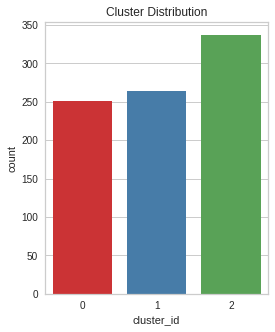

2    337
1    264
0    251
Name: cluster_id, dtype: int64


In [49]:
# Cluster Distribution

plt.figure(figsize=(4, 5))
sns.countplot(data=df_2, x='cluster_id', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

# Checking value counts of clusters

print(df_2.cluster_id.value_counts())

- Terdapat 337 customer dalam cluster 2, 264 dalam cluster 1, dan 251 customer dalam cluster 0.

In [56]:
c0 = df_2[df_2['cluster_id'] == 0]
c1 = df_2[df_2['cluster_id'] == 1]
c2 = df_2[df_2['cluster_id'] == 2]

In [57]:
# Cluster 0 Statistics
c0.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,251.0,3.495219e+01,8.833442e+00,20.0,28.5,33.0,40.0,63.0
Job,251.0,2.227092e+00,5.442638e-01,1.0,2.0,2.0,3.0,3.0
Credit amount,251.0,5.293182e+07,2.118546e+07,11270691.0,35733918.0,49162035.0,71201257.5,97518135.0
Duration,251.0,2.654183e+01,7.802643e+00,6.0,21.0,24.0,36.0,42.0
cluster_id,251.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [58]:
# Cluster 1 Statistics
c1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,264.0,2.663258e+01,5.098781e+00,19.0,23.00,25.5,29.0,48.0
Job,264.0,1.723485e+00,5.811173e-01,0.0,1.00,2.0,2.0,3.0
Credit amount,264.0,2.437719e+07,1.310327e+07,3422124.0,15334463.25,21983427.0,31270278.0,92645328.0
Duration,264.0,1.580303e+01,6.373590e+00,4.0,12.00,15.0,21.0,36.0
cluster_id,264.0,1.000000e+00,0.000000e+00,1.0,1.00,1.0,1.0,1.0


In [59]:
# Cluster 2 Statistics
c2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,337.0,4.067062e+01,9.971155e+00,22.0,33.0,39.0,47.0,64.0
Job,337.0,1.709199e+00,5.963717e-01,0.0,1.0,2.0,2.0,3.0
Credit amount,337.0,2.069533e+07,1.011004e+07,3099750.0,14308446.0,18090141.0,26645451.0,59155629.0
Duration,337.0,1.350742e+01,5.833052e+00,4.0,9.0,12.0,18.0,30.0
cluster_id,337.0,2.000000e+00,0.000000e+00,2.0,2.0,2.0,2.0,2.0


             Age  Job  Credit amount  Duration     Sex Housing  \
cluster_id                                                       
0           35.0  2.2     52931825.0      26.5    male     own   
1           26.6  1.7     24377185.5      15.8  female     own   
2           40.7  1.7     20695329.1      13.5    male     own   

           Saving accounts Checking account              Purpose  
cluster_id                                                        
0                   little           little                  car  
1                   little           little  furniture/equipment  
2                   little           little                  car  


Text(0.5, 1.0, 'Job')

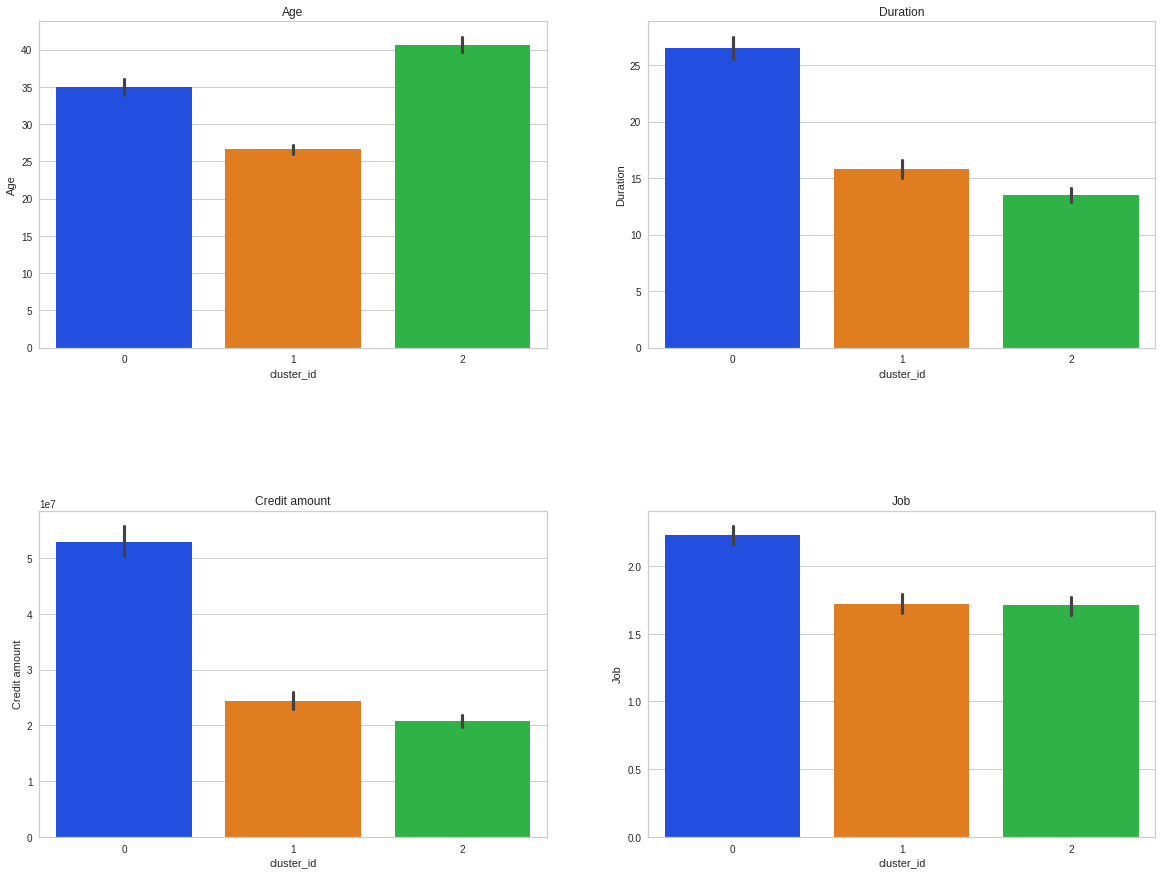

In [80]:
# Show barplot of clusters

fig,axs = plt.subplots(2,2, figsize = (20,15))
plt.subplot(2, 2, 1)
plt.subplots_adjust(hspace = 0.5)
sns.barplot(x= 'cluster_id', y = 'Age', data = df_2, palette='bright')
plt.title('Age')

plt.subplot(2, 2, 2)
sns.barplot(x= 'cluster_id', y = 'Duration', data = df_2, palette='bright')
plt.title('Duration')


plt.subplot(2, 2, 3)
sns.barplot(x= 'cluster_id', y = 'Credit amount', data = df_2, palette='bright')
plt.title('Credit amount')


plt.subplot(2, 2, 4)
sns.barplot(x= 'cluster_id', y = 'Job', data = df_2, palette='bright')
plt.title('Job')

In [81]:
# Get Overall Cluster Statistics

clusters_statistics=df_2.groupby('cluster_id').agg('mean').round(1)
clusters_statistics1=df_2[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'cluster_id']].groupby('cluster_id').agg(lambda x:x.value_counts().index[0])

stats_final = pd.concat([clusters_statistics, clusters_statistics1], axis=1)
stats_final

,Age,Job,Credit amount,Duration,Sex,Housing,Saving accounts,Checking account,Purpose
cluster_id,,,,,,,,,
0,35.0,2.2,52931825.0,26.5,male,own,little,little,car
1,26.6,1.7,24377185.5,15.8,female,own,little,little,furniture/equipment
2,40.7,1.7,20695329.1,13.5,male,own,little,little,car


**Insights:**

1. Cluster 0 : Rata-rata berumur 35 tahun, dengan rata-rata jumlah kredit paling banyak diantara semua cluster yaitu sebesar 52 juta rupiah. Dengan rata-rata duration paling lama diantara 3 cluster. Mayoritas berjenis kelamin laki-laki, dan tujuan peminjaman paling banyak untuk pembelian mobil.

2. Cluster 1: Rata-rta berumur 26 tahun, dengan rata-rata jumlah kredit kedua terbanyak diantara cluster, yaitu 24 juta rupiah. Dengan rata-rata duration selama 16 bulan. Mayoritas berjenis kelamin perempuan, dan tujuan peminjaman paling banyak adalah untuk pembelian furniture.

3. Cluster 2: Rata-rat berumur 41 tahun, dengan rata-rata jumlah kredit paling sedikit yaitu 20 juta rupiah. Dengan rata-rata duration paling cepat yaitu 14 bulan. Mayoritas berjenis kelamin laki-laki dan tujuan peminjaman paling banyak adalah untuk pembelian mobil.


## **Model Saving**

In [66]:
# Save the Files


with open('kmean.pkl', 'wb') as file_1:
  joblib.dump(kmean, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('famd.pkl', 'wb') as file_3:
  joblib.dump(famd, file_3)

with open('num_columns.txt', 'w') as file_3:
  json.dump(num_columns, file_3)

with open('cat_columns.txt', 'w') as file_4:
  json.dump(cat_columns, file_4)


## **Inferencing**

In [67]:
# Load the model

with open('kmean.pkl', 'rb') as file_1:
  kmean = joblib.load(file_1) 

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2) 

with open('famd.pkl', 'rb') as file_3:
  famd = joblib.load(file_3) 

with open('num_columns.txt', 'r') as file_3: 
  num_columns = json.load(file_3) 

with open('cat_columns.txt', 'r') as file_4: 
  cat_columns = json.load(file_4)


In [68]:
# Scaling 

df_inf_scaled = scaler.fit_transform(df_inf[num_columns])
df_inf_scaled1= pd.DataFrame(df_inf_scaled, columns = num_columns)

In [69]:
inf_final = pd.concat([df_inf_scaled1, df_inf[cat_columns]], axis=1)
inf_final

,Age,Job,Credit amount,Duration,Sex,Housing,Saving accounts,Checking account,Purpose
0,0.108108,0.0,0.636439,0.325,male,own,little,NaN,car
1,0.675676,0.0,0.819740,0.550,male,own,NaN,rich,radio/TV
2,1.000000,0.0,0.155930,0.100,male,own,little,NaN,car
3,0.243243,0.5,0.199889,0.000,male,own,little,moderate,radio/TV
4,0.297297,0.5,0.000000,0.100,male,own,little,little,car
5,0.891892,1.0,0.149295,0.400,female,rent,rich,little,radio/TV
6,0.459459,1.0,0.878352,0.400,female,rent,little,NaN,car
7,0.054054,0.5,0.972906,0.700,male,own,little,rich,radio/TV
8,0.000000,0.5,1.000000,1.000,female,rent,little,little,business
9,0.027027,0.5,0.316284,0.325,female,own,little,little,radio/TV


In [70]:
# Reduce with famd

famd.fit(inf_final)
inf_final_reduced = famd.transform(inf_final)

In [71]:
# Clustering using K-Means

kmean.fit(inf_final_reduced)
labels_inf=kmean.labels_

In [75]:
# Concat cluster with dataset
df_inf_final = inf_final.copy()
df_inf_final['cluster_id'] = labels_inf
df_inf_final

,Age,Job,Credit amount,Duration,Sex,Housing,Saving accounts,Checking account,Purpose,cluster_id
0,0.108108,0.0,0.636439,0.325,male,own,little,NaN,car,1
1,0.675676,0.0,0.819740,0.550,male,own,NaN,rich,radio/TV,1
2,1.000000,0.0,0.155930,0.100,male,own,little,NaN,car,1
3,0.243243,0.5,0.199889,0.000,male,own,little,moderate,radio/TV,1
4,0.297297,0.5,0.000000,0.100,male,own,little,little,car,1
5,0.891892,1.0,0.149295,0.400,female,rent,rich,little,radio/TV,2
6,0.459459,1.0,0.878352,0.400,female,rent,little,NaN,car,2
7,0.054054,0.5,0.972906,0.700,male,own,little,rich,radio/TV,0
8,0.000000,0.5,1.000000,1.000,female,rent,little,little,business,0
9,0.027027,0.5,0.316284,0.325,female,own,little,little,radio/TV,1


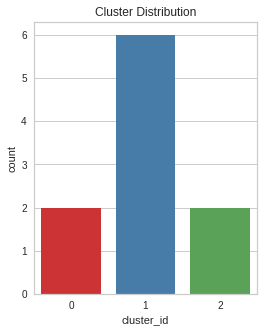

In [76]:
# See cluster distribution

plt.figure(figsize=(4, 5))
sns.countplot(data=df_inf_final, x='cluster_id', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

# **4 - Conclusion / Overall Analysis**

### **EDA Analysis**

- Hampir semua kolom terdistribusi secara skewed.
- Mayoritas customer berusia produktif yaitu 25 tahun - 35 tahun, 69% berjenis kelamin laki-laki.
- Mayoritas credit amount yang dimiliki customer yaitu pada rentang 10 juta rupiah hingga 40 juta rupiah.
- Mayortitas customer memiliki job pada category skilled.
- Mayoritas customer memiliki tempat tinggal milik  pribadi.
- Mayoritas customer memiliki rekening tabungan dengan kategori little.
- Mayoritas customer memiliki checking account dengan kategori little dan moderate.
- Tujuan peminjaman paling banyak adalah untuk tujuan kredit mobil, pembelian radio/TV, dan pembelin furniture/equipment.







### **Model Analysis K-Means**

Dalam melakukan customer segmentation, dilakukan teknik clustering dengan algoritma K-Means. Sebelum modelling, data melewati beberapa tahapan preprocessing seperti: handling outliers dan missing values, feature scaling, dan dimensional reduction. Evaluasi dari algoritma ini dapat dilihat dari visualisasi clusteringnya. Pada visualisasi clustering, tampak pemisah yang jelas antar clusternya, sehingga dapat disimpulkan hasil dari clustering cukup bagus.



Terdapat 3 cluster yang terbentuk, yaitu cluster 0, cluster 1, dan cluster 2.

**Dengan profile masing-masing cluster sebagai berikut:**

1. Cluster 0 : Rata-rata berumur 35 tahun, dengan rata-rata jumlah kredit paling banyak diantara semua cluster yaitu sebesar 52 juta rupiah. Dengan rata-rata duration paling lama diantara 3 cluster. Mayoritas berjenis kelamin laki-laki, dan tujuan peminjaman paling banyak untuk pembelian mobil.

2. Cluster 1: Rata-rta berumur 26 tahun, dengan rata-rata jumlah kredit kedua terbanyak diantara cluster, yaitu 24 juta rupiah. Dengan rata-rata duration selama 16 bulan. Mayoritas berjenis kelamin perempuan, dan tujuan peminjaman paling banyak adalah untuk pembelian furniture.

3. Cluster 2: Rata-rat berumur 41 tahun, dengan rata-rata jumlah kredit paling sedikit yaitu 20 juta rupiah. Dengan rata-rata duration paling cepat yaitu 14 bulan. Mayoritas berjenis kelamin laki-laki dan tujuan peminjaman paling banyak adalah untuk pembelian mobil.


### **Inference Analysis**

Model berhasil mengcluster data inf kedalam cluster. 